In [1]:
import os
import numpy as np
import pandas as pd

from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [2]:
avt_train=pd.read_csv("Train_SU63ISt.csv",index_col=1)
avt_train.head()

,ID,Count
Datetime,,
25-08-2012 00:00,0,8
25-08-2012 01:00,1,2
25-08-2012 02:00,2,6
25-08-2012 03:00,3,2
25-08-2012 04:00,4,2


In [3]:
idx=pd.to_datetime(avt_train.index).to_period("H")
avt_train.index=idx
avt_train.head()

/tmp/ipykernel_98219/1465845004.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  idx=pd.to_datetime(avt_train.index).to_period("H")


,ID,Count
Datetime,,
2012-08-25 00:00,0,8
2012-08-25 01:00,1,2
2012-08-25 02:00,2,6
2012-08-25 03:00,3,2
2012-08-25 04:00,4,2


In [4]:
avt_train.shape

(18288, 2)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Count'>)

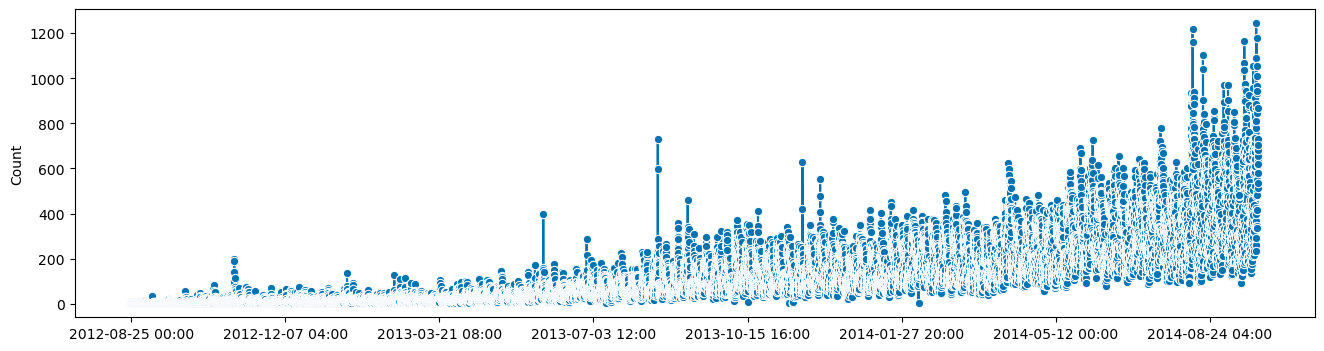

In [5]:
plot_series(avt_train.Count)

In [6]:
y_train=avt_train['Count']
print(y_train.shape)

(18288,)


In [7]:
import matplotlib.pyplot as plt

In [8]:
forecaster=AutoETS(auto=True,sp=24)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                  Count   No. Observations:                18288
Model:                       ETS(MAM)   Log Likelihood              -82913.715
Date:                Fri, 17 Nov 2023   AIC                         165887.430
Time:                        07:41:19   BIC                         166121.850
Sample:                    08-25-2012   HQIC                        165964.459
                         - 09-25-2014   Scale                            0.107
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.3346      0.004     76.425      0.000       0.326       0.343
smoothing_trend      3.346e-05   1.83e-05      1.832      0.067   -2.33e-06    6.93e-05
smoothing_season

In [9]:
y_test=pd.read_csv("Test_0qrQsBZ.csv",index_col=1)
y_test.head()

,ID
Datetime,
26-09-2014 00:00,18288
26-09-2014 01:00,18289
26-09-2014 02:00,18290
26-09-2014 03:00,18291
26-09-2014 04:00,18292


In [10]:
idx=pd.to_datetime(y_test.index).to_period("H")
y_test.index=idx
y_test.head()

/tmp/ipykernel_98219/2069774591.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  idx=pd.to_datetime(y_test.index).to_period("H")


,ID
Datetime,
2014-09-26 00:00,18288
2014-09-26 01:00,18289
2014-09-26 02:00,18290
2014-09-26 03:00,18291
2014-09-26 04:00,18292


In [11]:
fh=ForecastingHorizon(y_test.index,is_relative=False)
fh

ForecastingHorizon(['2014-09-26 00:00', '2014-09-26 01:00', '2014-09-26 02:00',
             '2014-09-26 03:00', '2014-09-26 04:00', '2014-09-26 05:00',
             '2014-09-26 06:00', '2014-09-26 07:00', '2014-09-26 08:00',
             '2014-09-26 09:00',
             ...
             '2015-04-26 14:00', '2015-04-26 15:00', '2015-04-26 16:00',
             '2015-04-26 17:00', '2015-04-26 18:00', '2015-04-26 19:00',
             '2015-04-26 20:00', '2015-04-26 21:00', '2015-04-26 22:00',
             '2015-04-26 23:00'],
            dtype='period[H]', name='Datetime', length=5112, is_relative=False)

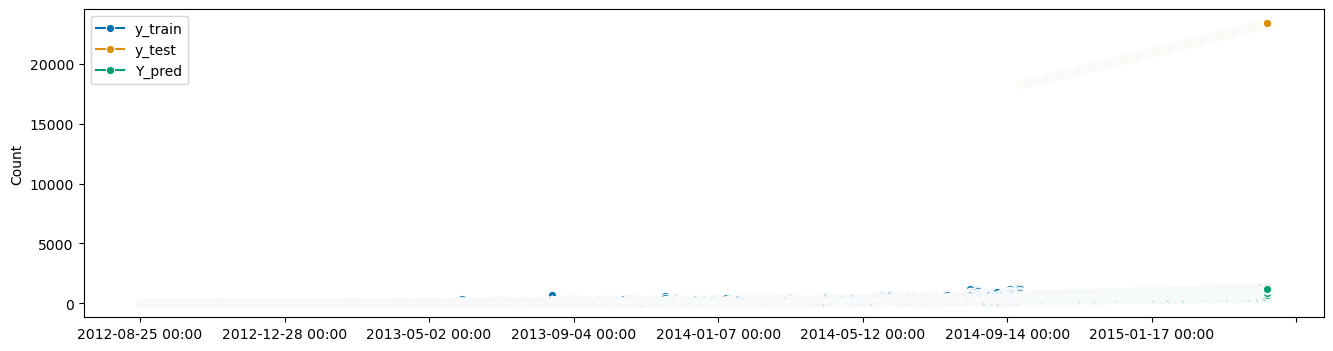

In [12]:
y_pred=forecaster.predict(fh)
plot_series(y_train,y_test,y_pred,labels=['y_train','y_test','Y_pred'])
plt.show()

In [13]:
submission=pd.DataFrame({'ID':y_test.ID,'Count':y_pred})
submission.head()

,ID,Count
2014-09-26 00:00,18288,561.453720
2014-09-26 01:00,18289,439.191292
2014-09-26 02:00,18290,377.724606
2014-09-26 03:00,18291,308.033148
2014-09-26 04:00,18292,264.485340


In [14]:
submission.to_csv("AV_Time.csv",index=False)